## Objective - Create entanglement between two qubits

In [1]:
# Import libraries
from qiskit import QuantumCircuit, assemble, Aer, execute, IBMQ, __qiskit_version__
from qiskit_textbook.tools import array_to_latex
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

#### Create circuit

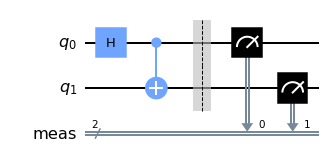

In [2]:
qc = QuantumCircuit(2)    # Quantum circuit with 2 qubits and 2 bits
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

qobj = assemble(qc)

qc.draw(output='mpl')


#### get the statevector

In [6]:
qc_2 = QuantumCircuit(2)    # Quantum circuit with 2 qubits and 2 bits
qc_2.h(0)
qc_2.cx(0, 1)

qobj_2 = assemble(qc_2)

# NOTE: qc.measure_all() is not included bc it will mess up the probability vector.

sv_sim = Aer.get_backend('statevector_simulator')
state = sv_sim.run(qobj_2).result().get_statevector()

# Show result of sim.
array_to_latex(state, pretext="\\text{Probabilitiy Vector = }")

<IPython.core.display.Math object>

#### simulate circuit

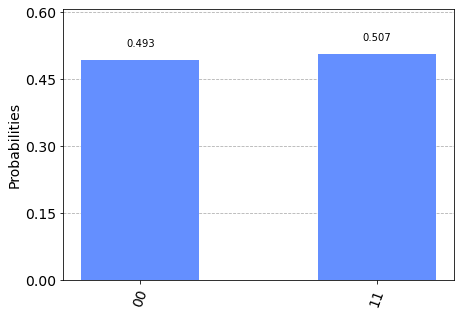

In [7]:
simulator = Aer.get_backend('qasm_simulator')

job = execute(qc, simulator, shots=1000)

results = job.result()
counts = results.get_counts()

plot_histogram(counts)


#### Check on bloch sphere

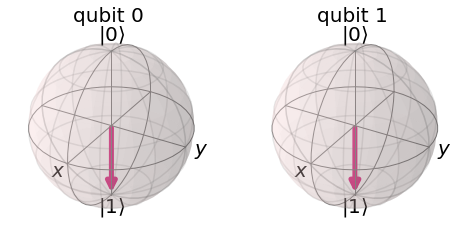

In [8]:
simulator = Aer.get_backend('statevector_simulator')

job = simulator.run(qobj)
statevector = job.result().get_statevector()

plot_bloch_multivector(statevector)
